<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-20 16:25:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  46.1MB/s    in 0.8s    

2024-06-20 16:25:29 (46.1 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [69]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [5]:
import pandas as pd


## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [67]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
print(df)


                Table_Name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master


In [70]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [10]:
pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
print(df.head())

                                                 sql
0  CREATE TABLE "master" (\n"index" INTEGER,\n  "...


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

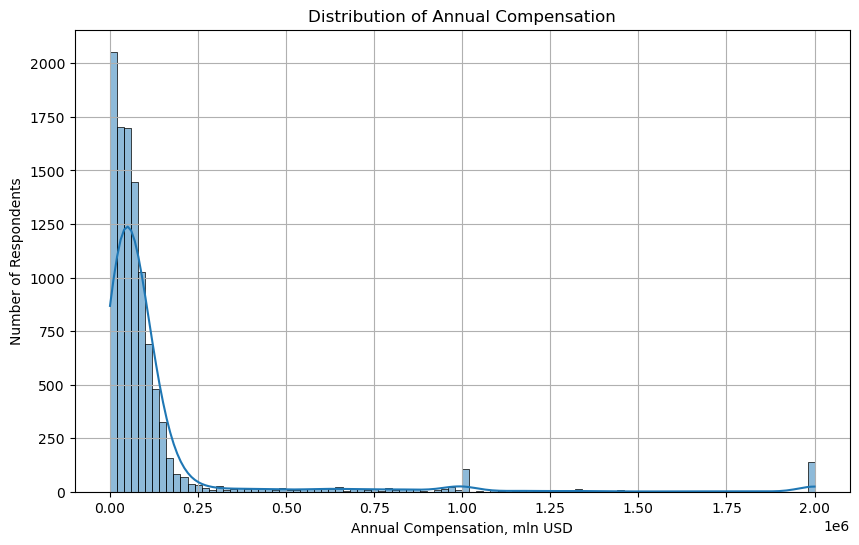

In [14]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT ConvertedComp 
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=100, kde=True)
plt.title('Distribution of Annual Compensation')
plt.xlabel('Annual Compensation, mln USD')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


### Box Plots


Plot a box plot of `Age.`


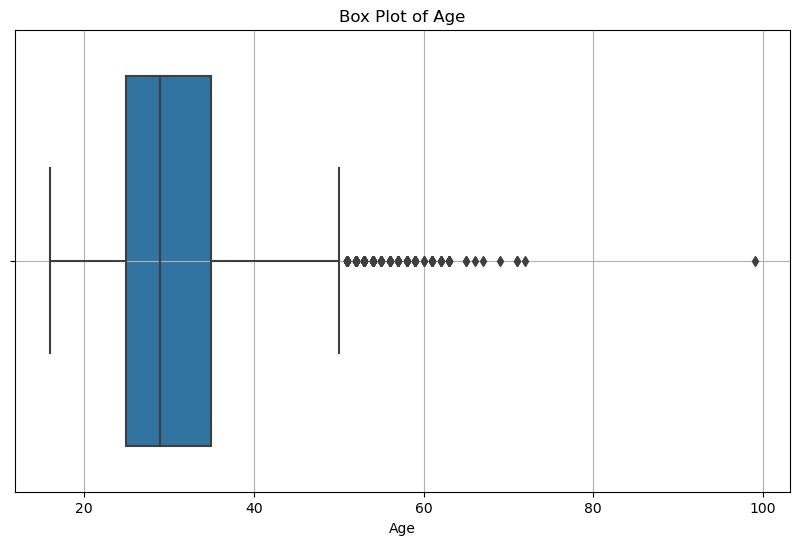

In [16]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT Age 
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


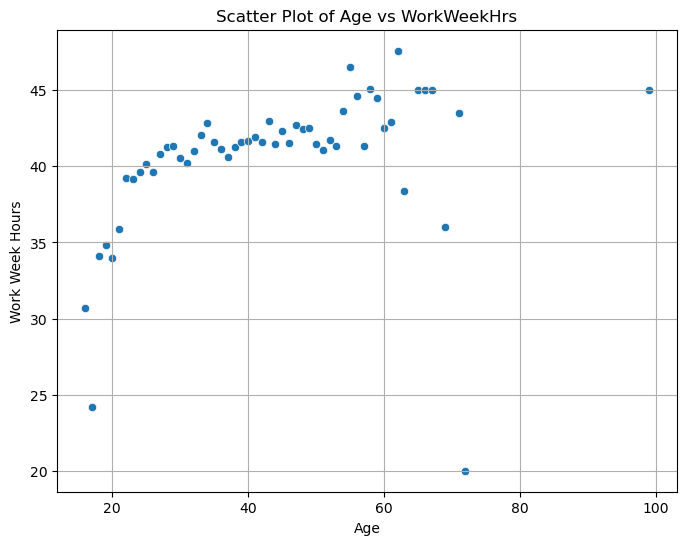

In [45]:
conn = sqlite3.connect("m4_survey_data.sqlite")

QUERY = """
SELECT Age, AVG(WorkWeekHrs) AS AvgWorkWeekHrs
FROM master
WHERE WorkWeekHrs <= 160
GROUP BY Age
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=df, x='Age', y='AvgWorkWeekHrs')

plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [62]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT Age, AVG(WorkWeekHrs) AS AvgWorkWeekHrs, AVG(CodeRevHrs) AS AvgCodeRevHrs
FROM master
WHERE WorkWeekHrs <= 160
GROUP BY Age
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

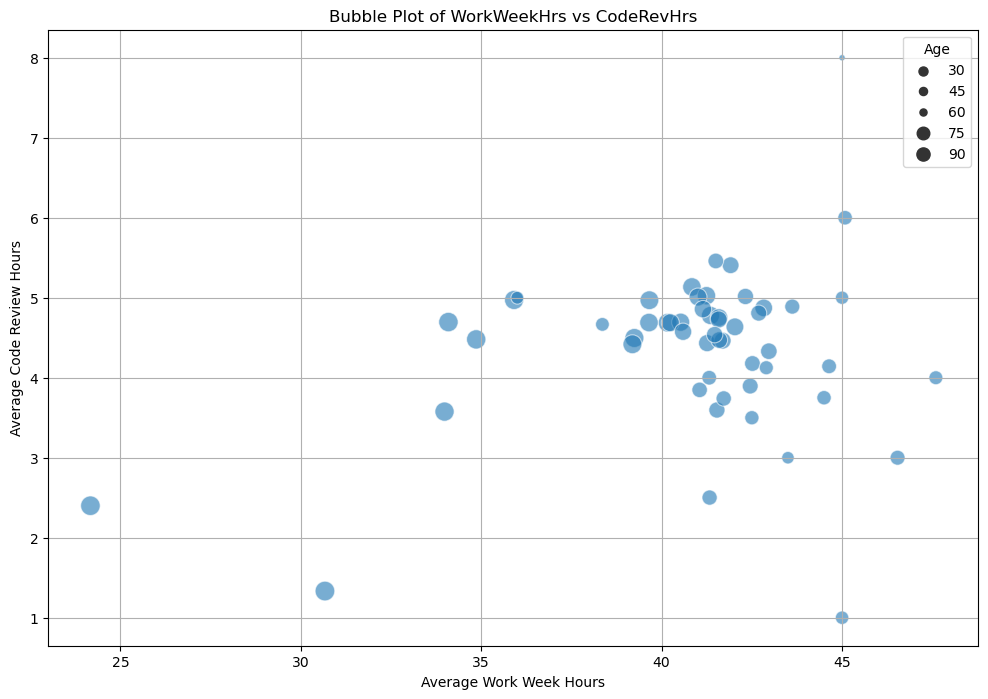

In [63]:
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(data=df, x='AvgWorkWeekHrs', y='AvgCodeRevHrs', size='Age', sizes=(200, 20), alpha=0.6)

plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
plt.xlabel('Average Work Week Hours')
plt.ylabel('Average Code Review Hours')
plt.legend(title='Age', markerscale=0.5)
plt.grid(True)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [87]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Respondents
FROM DatabaseDesireNextYear
WHERE DatabaseDesireNextYear != 'Other(s)'
GROUP BY DatabaseDesireNextYear
ORDER BY Respondents DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
df

,DatabaseDesireNextYear,Respondents
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


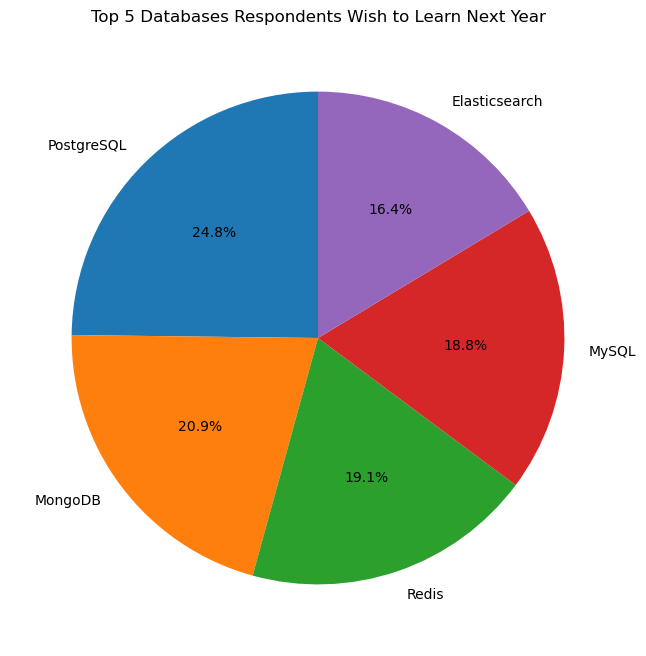

In [89]:
plt.figure(figsize=(8, 8))
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.pie(df['Respondents'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90)
plt.show()

In [165]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) AS Respondents
FROM LanguageDesireNextYear
WHERE LanguageDesireNextYear != 'Other(s)'
GROUP BY LanguageDesireNextYear
ORDER BY Respondents DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
df

,LanguageDesireNextYear,Respondents
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [166]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT LanguageWorkedWith, COUNT(*) AS Respondents
FROM LanguageWorkedWith
WHERE LanguageWorkedWith != 'Other(s)'
GROUP BY LanguageWorkedWith
ORDER BY Respondents DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
df

,LanguageWorkedWith,Respondents
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


In [167]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT DevType, COUNT(*) AS Respondents
FROM DevType
GROUP BY DevType
ORDER BY Respondents DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
df

,DevType,Respondents
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [110]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()
df



,Age,WorkWeekHrs,CodeRevHrs
0,31.0,8.0,3.0
1,34.0,40.0,2.0
2,32.0,40.0,2.0
3,34.0,42.0,15.0
4,33.0,40.0,2.0
...,...,...,...
2937,32.0,42.0,4.0
2938,32.0,50.0,2.0
2939,32.0,56.0,14.0
2940,34.0,40.0,5.0


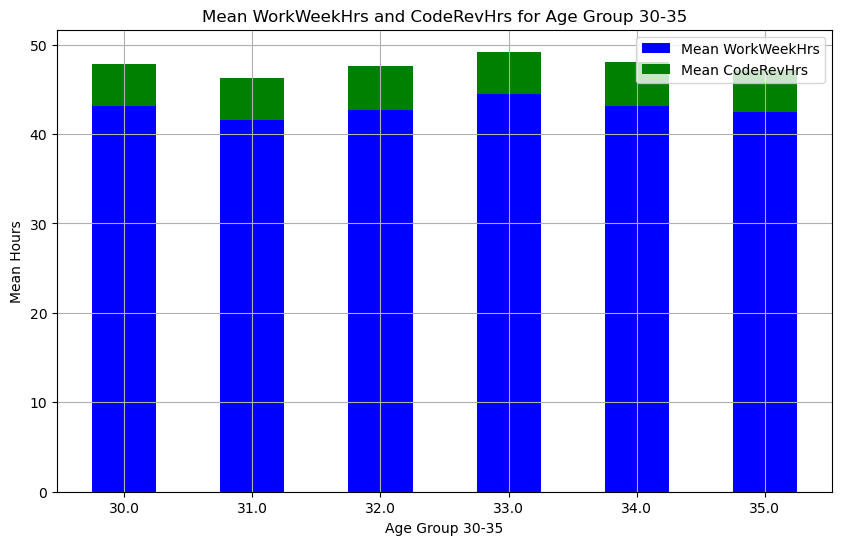

In [111]:
df_mean = df.groupby('Age').mean().reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.5
r1 = range(len(df_mean))

plt.bar(r1, df_mean['WorkWeekHrs'], color='b', width=bar_width, label='Mean WorkWeekHrs')
plt.bar(r1, df_mean['CodeRevHrs'], color='g', width=bar_width, bottom=df_mean['WorkWeekHrs'], label='Mean CodeRevHrs')

plt.xlabel('Age Group 30-35')
plt.ylabel('Mean Hours')
plt.title('Mean WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xticks(r1, df_mean['Age'])
plt.legend()

plt.grid(True)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [112]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()




In [168]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 20 AND 35
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()




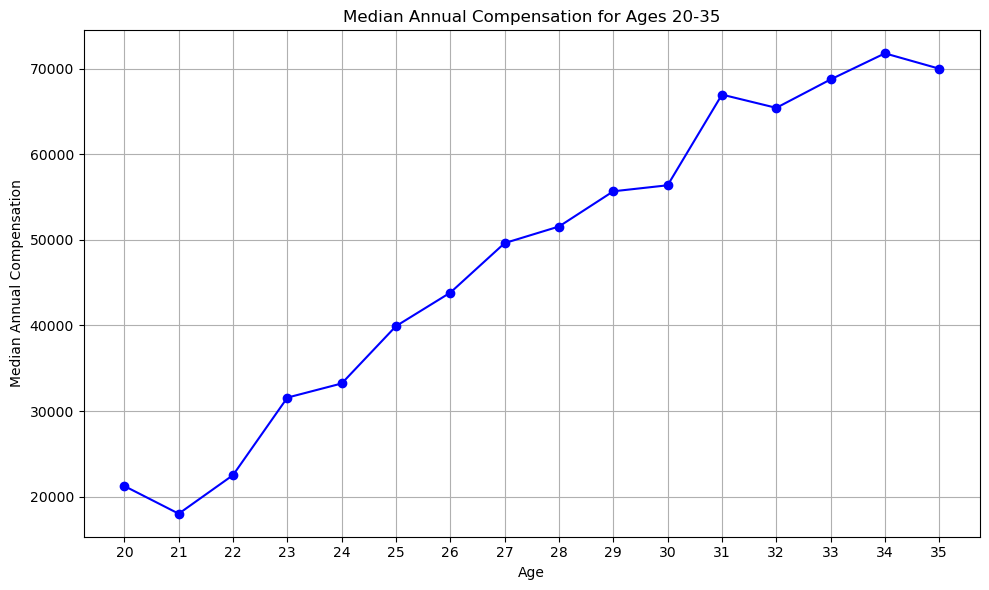

In [170]:
df_median = df.groupby('Age')['ConvertedComp'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_median['Age'], df_median['ConvertedComp'], marker='o', linestyle='-', color='b')

plt.title('Median Annual Compensation for Ages 20-35')
plt.xlabel('Age')
plt.ylabel('Median Annual Compensation')
plt.grid(True)
plt.xticks(df_median['Age'])
plt.tight_layout()

plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [148]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """
SELECT MainBranch, COUNT(*) AS Respondent_Count
FROM master
GROUP BY MainBranch
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

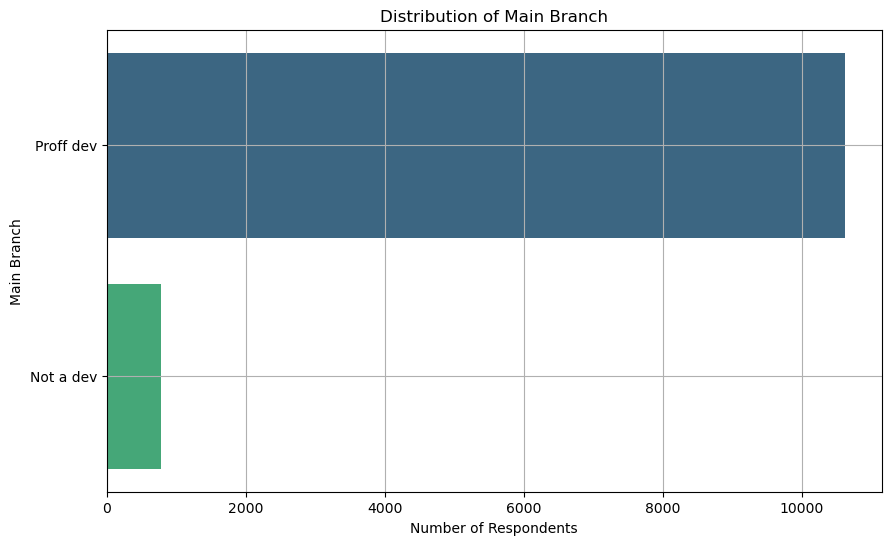

In [151]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Respondent_Count', y='MainBranch', data=df, palette='viridis')

plt.title('Distribution of Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.grid(True)
custom_y_ticks = ['Proff dev', 'Not a dev']  # Replace with your custom labels
plt.yticks(range(len(custom_y_ticks)), custom_y_ticks)
plt.show()



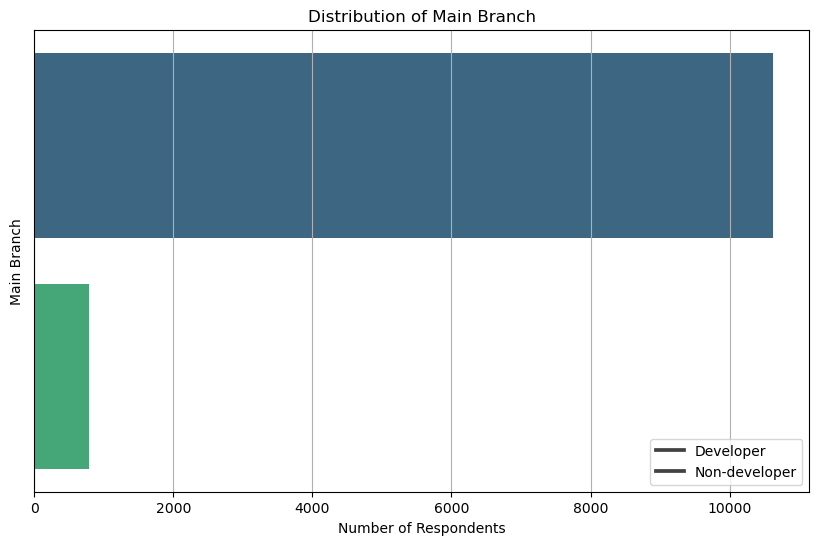

In [163]:
plt.figure(figsize=(10, 6))

# Create the bar plot with explicit palette
barplot = sns.barplot(x='Respondent_Count', y='MainBranch', data=df, palette='viridis')

plt.title('Distribution of Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.grid(True)
custom_y_ticks = []
plt.yticks(range(len(custom_y_ticks)), custom_y_ticks)
legend_labels = ['Developer', 'Non-developer']
plt.legend(labels=legend_labels)


plt.show()


Close the database connection.


In [164]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
